In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Testing
### Rastringin function

In [2]:
A = 10
d = 2
def Rastringin(x):
    return (A*d + np.dot(x,x) - A*np.sum(np.cos(2.*np.pi*x)))

In [3]:
def Rastringin_gradient(x):
    grad = np.empty(len(x))
    for i in range(len(grad)):
        grad[i] = (2.*x[i] + A*np.sin(2.*np.pi*x[i])*2.*np.pi)
    return grad

In [4]:
def Rastringin_hessian(x):
    hess = np.zeros((len(x),len(x)))
    for i in range(len(hess)):
        hess[i,i] = (2 + A*np.cos(2.*np.pi*x[i])*(4.*np.pi*np.pi))
    return hess

In [5]:
X = np.arange(-5,5,1e-1)
Y = np.arange(-5,5,1e-1)

In [6]:
Z = np.empty((len(X),len(Y)))

In [7]:
for i in range(len(X)):
    for j in range((len(Y))):
        Z[i,j] = Rastringin(np.array([X[i],Y[j]]))

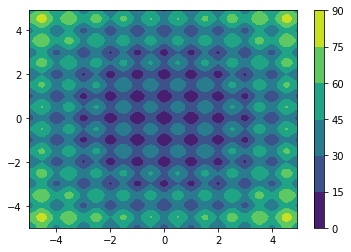

In [8]:
plt.contourf(X,Y,Z); plt.colorbar();

In [61]:
k = 2
bounds = np.ones((k,2))*5; bounds[:,0] = bounds[:,1]*(-1);
bounds;

In [66]:
%run HXDY.ipynb

[ 1.  0. inf inf inf inf inf inf inf inf]


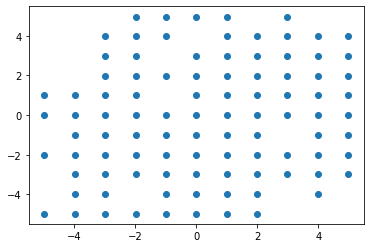

[ 1.  0.  0. inf inf inf inf inf inf inf]


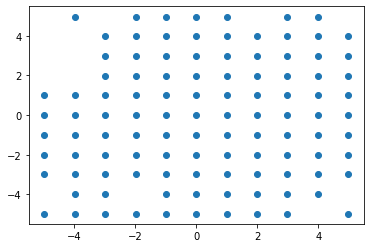

[ 1.  0.  0.  0. inf inf inf inf inf inf]


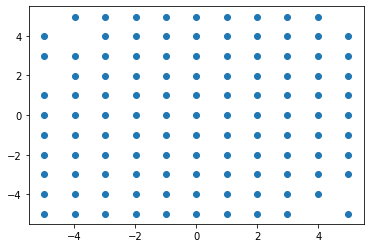

[ 1.  0.  0.  0.  0. inf inf inf inf inf]


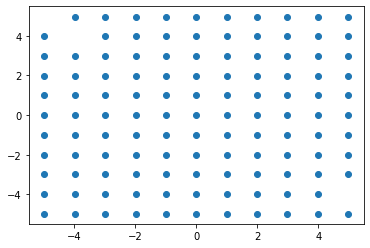

[ 1.  0.  0.  0.  0.  0. inf inf inf inf]


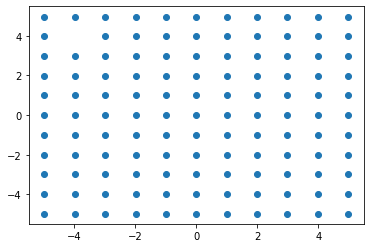

[ 1.  0.  0.  0.  0.  0.  0. inf inf inf]


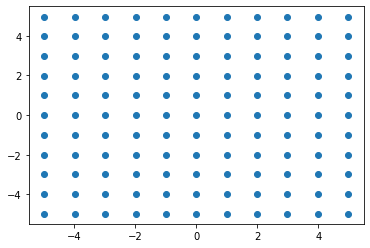

[ 1.  0.  0.  0.  0.  0.  0.  0. inf inf]


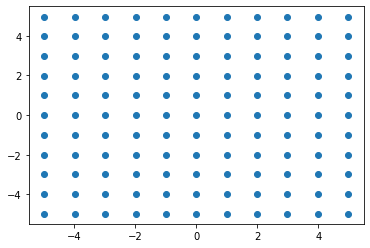

[ 1.  0.  0.  0.  0.  0.  0.  0.  0. inf]


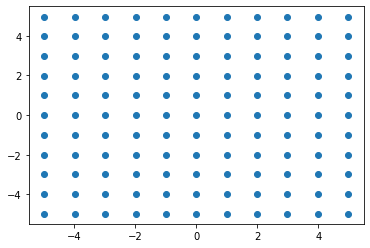

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


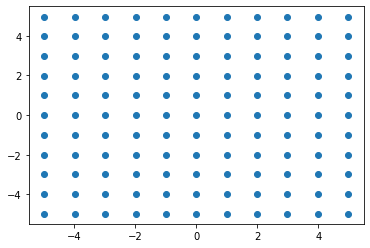

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


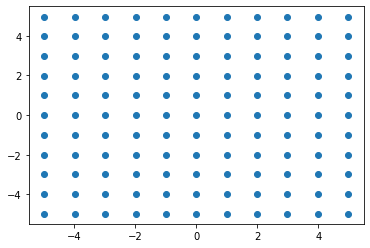

In [67]:
res = HXDY(fun=Rastringin, bounds=bounds, hess=Rastringin_hessian, jac=Rastringin_gradient)

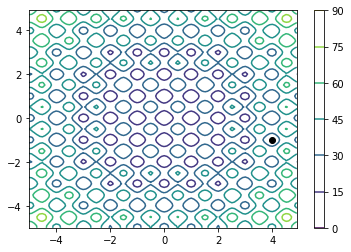

In [90]:
plt.scatter(res[:,0], res[:,1], color='black');
plt.contour(X,Y,Z); plt.colorbar();

### Schwefel Function

In [13]:
def Schwefel(x):
    total = 0
    for i in range(len(x)):
        if np.abs(x[i]) <= 500:
            total += -x[i]*np.sin(np.sqrt(np.abs(x[i])))
        else:
            total += .02*x[i]*x[i]
    return -(-418.9829*(len(x)+1) - total)

In [14]:
def Schwefel_gradient(X):
    y = np.empty(len(X))

    Sin = np.sin
    Abs = np.abs
    Cos = np.cos
    Sqrt = np.sqrt

    for i in range(len(X)):
        x = X[i]

        if x<0:
            slope = -1.
        else:
            slope = 1.

        y[i] = -Sin(Sqrt(Abs(x))) - x*Cos(Sqrt(Abs(x)))*slope/(2.*Sqrt(Abs(x)))
    return -y

In [15]:
def Schwefel_hessian(x):
    Sin = np.sin
    Abs = np.abs
    Cos = np.cos
    Sqrt = np.sqrt
        
    hess = np.zeros((len(x), len(x)))
    
    for i in range(len(x)):
        xi = x[i]
        if xi<0:
            slope = -1.
        else:
            slope = 1.

        factor = 1./(4.*Abs(xi)**1.5)
        term1 = xi*Sqrt(Abs(xi))*Sin(Sqrt(Abs(xi)))
        term2 = Cos(Sqrt(Abs(xi)))*(xi-2.*Abs(xi)*(2.*slope))
        hess[i,i] = factor*(term1+term2)
    return - hess

In [16]:
X = np.arange(-500,500,1e0)
Y = np.arange(-500,500,1e0)

In [17]:
Z = np.empty((len(X),len(Y)))

In [18]:
for i in range(len(X)):
    for j in range((len(Y))):
        Z[i,j] = Schwefel(np.array([X[i],Y[j]]))

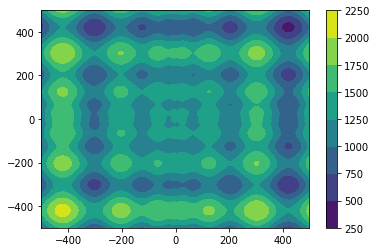

In [19]:
plt.contourf(X,Y,Z); plt.colorbar();

In [20]:
k = 2
bounds = np.ones((k,2))*500; bounds[:,0] = bounds[:,1]*(-1);
bounds;

In [21]:
res = HXDY(fun=Schwefel, bounds=bounds, args=(), jac=Schwefel_gradient, tol=1e-4, 
                                  hess=Schwefel_hessian, epsilon=1e-8, maxCount=20, alpha=1., 
                                  unfairness=5, N=100, keepLastX = 3, numWorkers=-1, method='L-BFGS-B',
          extraStoppingCriterion=lambda res: True if len(res)>30 else False); 

False
[419. 419.  inf]
False
[419. 419. 419.]


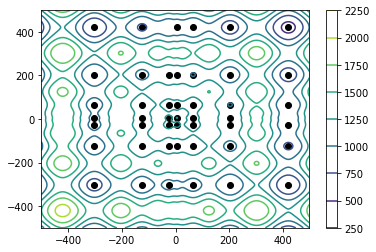

In [22]:
plt.scatter(res[:,0], res[:,1], color='black');
plt.contour(X,Y,Z); plt.colorbar();

In [45]:
k = 4
bounds = np.ones((k,2))*500; bounds[:,0] = bounds[:,1]*(-1);
bounds;

In [60]:
%run HXDY.ipynb

This call is taking a long time

In [ ]:
res = HXDY(fun=Schwefel, bounds=bounds, jac=Schwefel_gradient, hess=Schwefel_hessian); 

[537. 537.  inf  inf  inf  inf  inf  inf  inf  inf]
[537. 537. 537.  inf  inf  inf  inf  inf  inf  inf]
[537. 537. 537. 537.  inf  inf  inf  inf  inf  inf]


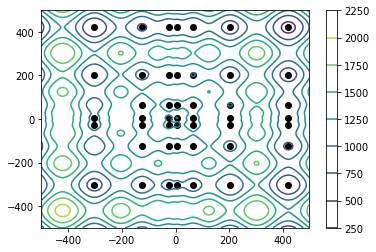

In [37]:
plt.scatter(res[:,0], res[:,1], color='black');
plt.contour(X,Y,Z); plt.colorbar();

In [38]:
res[:7].round(4)

array([[ 420.9687,  420.9687,  418.9829],
       [-302.5249,  420.9687,  537.4213],
       [ 420.9688, -302.5249,  537.4213],
       [ 420.9687,  203.8143,  636.1226],
       [ 203.8143,  420.9687,  636.1226],
       [-302.525 , -302.5249,  655.8596],
       [ 420.9688, -124.8294,  715.0896]])

### Rosen function

In [42]:
from scipy.optimize import rosen, rosen_der, rosen_hess

In [43]:
X = np.arange(-2.5, 2.5, 1e-2)
Y = np.arange(-2.5, 2.5, 1e-2)

In [44]:
Z = np.empty((len(X),len(Y)))

In [45]:
for i in range(len(X)):
    for j in range((len(Y))):
        Z[i,j] = rosen(np.array([X[i],Y[j]]))

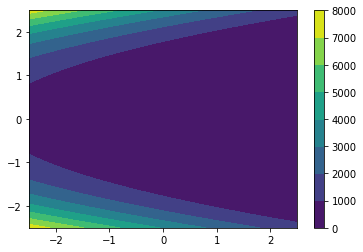

In [46]:
plt.contourf(X,Y,Z); plt.colorbar();

In [47]:
k = 2
bounds = np.ones((k,2))*3; bounds[:,0] = bounds[:,1]*(-1);
bounds;

In [48]:
res = HXDY(fun=rosen, bounds=bounds, args=(), jac=rosen_der, tol=1e-8, 
                                  hess=rosen_hess, epsilon=1e-8, maxCount=50, alpha=.1, cauchy_wildness=50,
                                  unfairness=2, N=100, keepLastX = 10, numWorkers=-1, method='Newton-CG'); 

[2.00556147e-11 2.00556147e-11            inf            inf
            inf            inf            inf            inf
            inf            inf]
[2.00556147e-11 2.00556147e-11 2.00556147e-11            inf
            inf            inf            inf            inf
            inf            inf]
[2.00556147e-11 2.00556147e-11 2.00556147e-11 2.00556147e-11
            inf            inf            inf            inf
            inf            inf]
[2.00556147e-11 2.00556147e-11 2.00556147e-11 2.00556147e-11
 2.00556147e-11            inf            inf            inf
            inf            inf]
[2.00556147e-11 2.00556147e-11 2.00556147e-11 2.00556147e-11
 2.00556147e-11 2.00556147e-11            inf            inf
            inf            inf]
[2.00556147e-11 2.00556147e-11 2.00556147e-11 2.00556147e-11
 2.00556147e-11 2.00556147e-11 2.00556147e-11            inf
            inf            inf]
[2.00556147e-11 2.00556147e-11 2.00556147e-11 2.00556147e-11
 2.00556147e-11

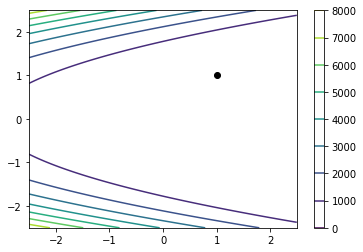

In [49]:
plt.scatter(res[:,0], res[:,1], color='black');
plt.contour(X,Y,Z); plt.colorbar();

In [50]:
res

array([[9.99995522e-01, 9.99991037e-01, 2.00556147e-11]])

In [19]:
def f(x,scale=1., sub=0):
    return np.sum(x)*scale-sub

In [20]:
def wrapper(x0, fun, *args, **kwargs):
    return fun(x0, *args, **kwargs)

In [24]:
wrapper(np.ones(2), f, *(2, 1))

3.0